# Alpha Stability Test

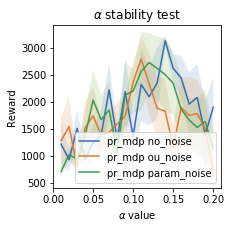

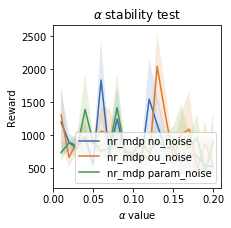

In [27]:
plot_alpha('Hopper-v2', r"$\alpha$ stability test")

As one may see, the PR-MDP acts as expected. There is an optimal $\alpha$ value and deviating from this value deteriorates the performance.

In the NR-MDP this is not the case, the performance looks quite random as a function of $\alpha$.

# Exploration Ablation

## Baseline

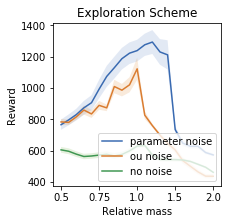

In [61]:
params = ['param_noise/non_robust', 'ou_noise/non_robust', 'no_noise/non_robust']
names = ['parameter noise', 'ou noise', 'no noise']
plot_env('Hopper-v2', params, names, 'Exploration Scheme')

These results show that the baseline attains the optimal performance using the parameter space noise during training.

## NR-MDP

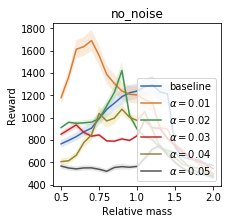

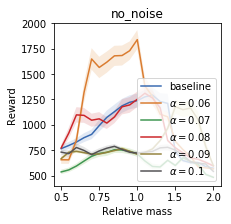

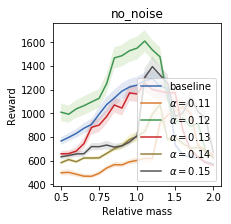

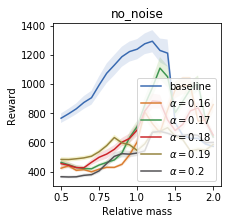

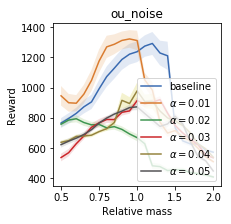

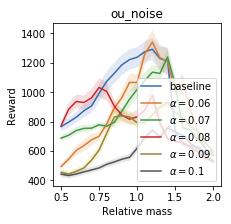

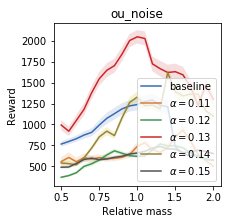

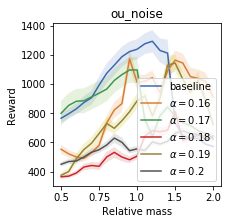

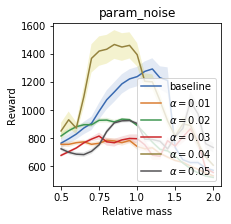

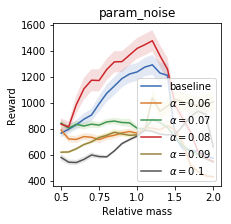

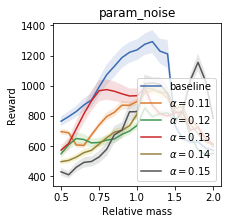

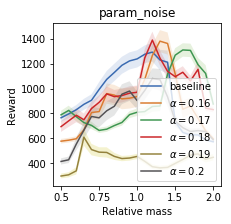

In [38]:
for noise in ['no_noise', 'ou_noise', 'param_noise']:
    params = ['param_noise/non_robust']
    names = ['baseline']
    for alpha in [0.01, 0.02, 0.03, 0.04, 0.05]:
        alpha_str = str(alpha)
        params.append(noise + '/nr_mdp_' + alpha_str + '_10')
        names.append(r"$\alpha=" + alpha_str + "$")
    plot_env('Hopper-v2', params, names, noise)
    
    params = ['param_noise/non_robust']
    names = ['baseline']
    for alpha in [0.06, 0.07, 0.08, 0.09, 0.1]:
        alpha_str = str(alpha)
        params.append(noise + '/nr_mdp_' + alpha_str + '_10')
        names.append(r"$\alpha=" + alpha_str + "$")
    plot_env('Hopper-v2', params, names, noise)
    
    params = ['param_noise/non_robust']
    names = ['baseline']
    for alpha in [0.11, 0.12, 0.13, 0.14, 0.15]:
        alpha_str = str(alpha)
        params.append(noise + '/nr_mdp_' + alpha_str + '_10')
        names.append(r"$\alpha=" + alpha_str + "$")
    plot_env('Hopper-v2', params, names, noise)
    
    params = ['param_noise/non_robust']
    names = ['baseline']
    for alpha in [0.16, 0.17, 0.18, 0.19, 0.2]:
        alpha_str = str(alpha)
        params.append(noise + '/nr_mdp_' + alpha_str + '_10')
        names.append(r"$\alpha=" + alpha_str + "$")
    plot_env('Hopper-v2', params, names, noise)

## PR-MDP

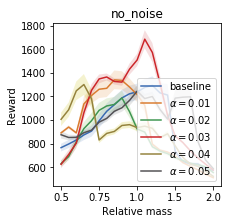

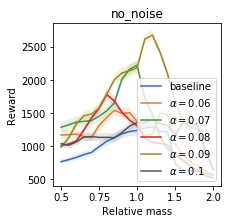

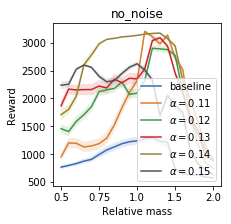

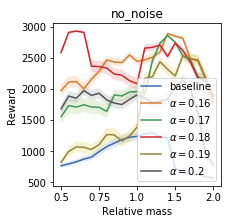

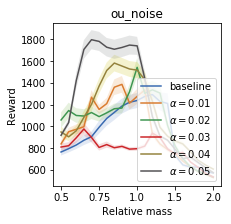

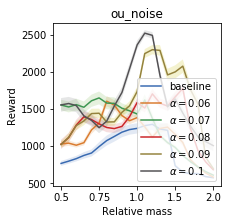

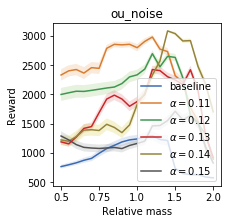

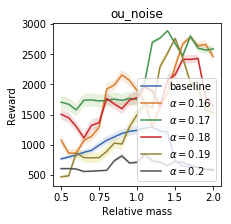

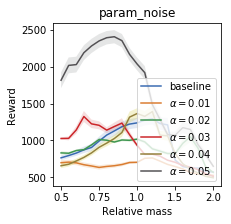

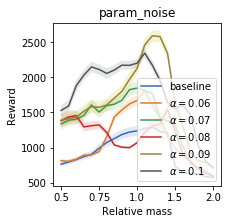

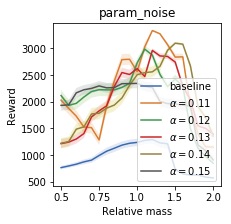

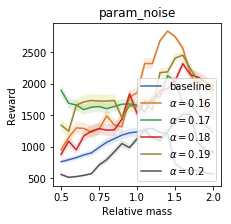

In [39]:
for noise in ['no_noise', 'ou_noise', 'param_noise']:
    params = ['param_noise/non_robust']
    names = ['baseline']
    for alpha in [0.01, 0.02, 0.03, 0.04, 0.05]:
        alpha_str = str(alpha)
        params.append(noise + '/pr_mdp_' + alpha_str + '_10')
        names.append(r"$\alpha=" + alpha_str + "$")
    plot_env('Hopper-v2', params, names, noise)
    
    params = ['param_noise/non_robust']
    names = ['baseline']
    for alpha in [0.06, 0.07, 0.08, 0.09, 0.1]:
        alpha_str = str(alpha)
        params.append(noise + '/pr_mdp_' + alpha_str + '_10')
        names.append(r"$\alpha=" + alpha_str + "$")
    plot_env('Hopper-v2', params, names, noise)
    
    params = ['param_noise/non_robust']
    names = ['baseline']
    for alpha in [0.11, 0.12, 0.13, 0.14, 0.15]:
        alpha_str = str(alpha)
        params.append(noise + '/pr_mdp_' + alpha_str + '_10')
        names.append(r"$\alpha=" + alpha_str + "$")
    plot_env('Hopper-v2', params, names, noise)
    
    params = ['param_noise/non_robust']
    names = ['baseline']
    for alpha in [0.16, 0.17, 0.18, 0.19, 0.2]:
        alpha_str = str(alpha)
        params.append(noise + '/pr_mdp_' + alpha_str + '_10')
        names.append(r"$\alpha=" + alpha_str + "$")
    plot_env('Hopper-v2', params, names, noise)

# Actor:Adversary Ratio

## NR-MDP

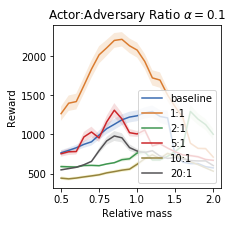

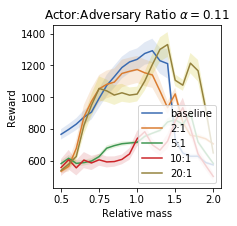

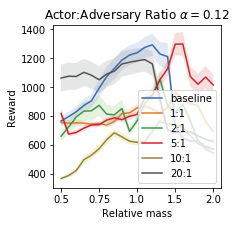

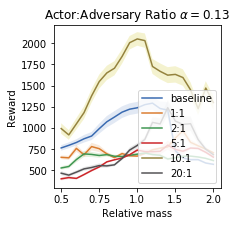

In [40]:
params = ['param_noise/non_robust', 'ou_noise/nr_mdp_0.1_1', 'ou_noise/nr_mdp_0.1_2', 'ou_noise/nr_mdp_0.1_5', 'ou_noise/nr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_20']
names = ['baseline', '1:1', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, r"Actor:Adversary Ratio $\alpha=0.1$")

params = ['param_noise/non_robust', 'pou_noise/nr_mdp_0.11_1', 'ou_noise/nr_mdp_0.11_2', 'ou_noise/nr_mdp_0.11_5', 'ou_noise/nr_mdp_0.11_10', 'ou_noise/nr_mdp_0.11_20']
names = ['baseline', '1:1', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, r"Actor:Adversary Ratio $\alpha=0.11$")

params = ['param_noise/non_robust', 'ou_noise/nr_mdp_0.12_1', 'ou_noise/nr_mdp_0.12_2', 'ou_noise/nr_mdp_0.12_5', 'ou_noise/nr_mdp_0.12_10', 'ou_noise/nr_mdp_0.12_20']
names = ['baseline', '1:1', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, r"Actor:Adversary Ratio $\alpha=0.12$")

params = ['param_noise/non_robust', 'ou_noise/nr_mdp_0.13_1', 'ou_noise/nr_mdp_0.13_2', 'ou_noise/nr_mdp_0.13_5', 'ou_noise/nr_mdp_0.13_10', 'ou_noise/nr_mdp_0.13_20']
names = ['baseline', '1:1', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, r"Actor:Adversary Ratio $\alpha=0.13$")

## PR-MDP

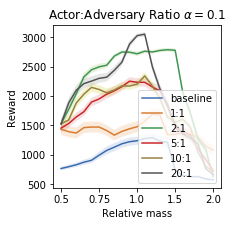

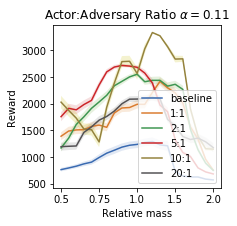

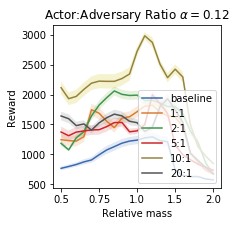

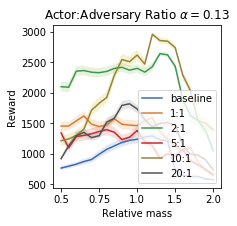

In [41]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_1', 'param_noise/pr_mdp_0.1_2', 'param_noise/pr_mdp_0.1_5', 'param_noise/pr_mdp_0.1_10', 'param_noise/pr_mdp_0.1_20']
names = ['baseline', '1:1', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, r"Actor:Adversary Ratio $\alpha=0.1$")

params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.11_1', 'param_noise/pr_mdp_0.11_2', 'param_noise/pr_mdp_0.11_5', 'param_noise/pr_mdp_0.11_10', 'param_noise/pr_mdp_0.11_20']
names = ['baseline', '1:1', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, r"Actor:Adversary Ratio $\alpha=0.11$")

params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.12_1', 'param_noise/pr_mdp_0.12_2', 'param_noise/pr_mdp_0.12_5', 'param_noise/pr_mdp_0.12_10', 'param_noise/pr_mdp_0.12_20']
names = ['baseline', '1:1', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, r"Actor:Adversary Ratio $\alpha=0.12$")

params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.13_1', 'param_noise/pr_mdp_0.13_2', 'param_noise/pr_mdp_0.13_5', 'param_noise/pr_mdp_0.13_10', 'param_noise/pr_mdp_0.13_20']
names = ['baseline', '1:1', '2:1', '5:1', '10:1', '20:1']
plot_env('Hopper-v2', params, names, r"Actor:Adversary Ratio $\alpha=0.13$")

# Flipped Ratio

## NR-MDP

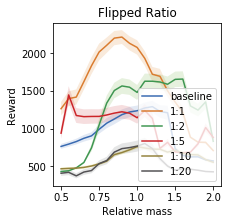

In [42]:
params = ['param_noise/non_robust', 'ou_noise/nr_mdp_0.1_1', 'ou_noise/flip_ratio_nr_mdp_0.1_2', 'ou_noise/flip_ratio_nr_mdp_0.1_5', 'ou_noise/flip_ratio_nr_mdp_0.1_10', 'ou_noise/flip_ratio_nr_mdp_0.1_20']
names = ['baseline', '1:1', '1:2', '1:5', '1:10', '1:20']
plot_env('Hopper-v2', params, names, 'Flipped Ratio')

## PR-MDP

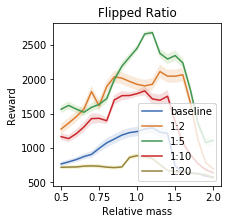

In [43]:
params = ['param_noise/non_robust', 'param_noise/flip_ratio_pr_mdp_0.1_2', 'param_noise/flip_ratio_pr_mdp_0.1_5', 'param_noise/flip_ratio_pr_mdp_0.1_10', 'param_noise/flip_ratio_pr_mdp_0.1_20']
names = ['baseline', '1:2', '1:5', '1:10', '1:20']
plot_env('Hopper-v2', params, names, 'Flipped Ratio')

# Operator vs Exploration

## NR-MDP

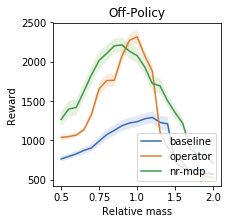

In [44]:
params = ['param_noise/non_robust', 'param_noise/alternative_nr_mdp_0.1_1', 'ou_noise/nr_mdp_0.1_1']
names = ['baseline', 'operator', 'nr-mdp']
plot_env('Hopper-v2', params, names, 'Off-Policy')

## PR-MDP

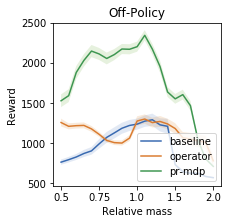

In [45]:
params = ['param_noise/non_robust', 'param_noise/alternative_pr_mdp_0.1_10', 'param_noise/pr_mdp_0.1_10']
names = ['baseline', 'operator', 'pr-mdp']
plot_env('Hopper-v2', params, names, 'Off-Policy')

# Evaluation across MuJoCo using 2D Heatmaps

## Hopper-v2

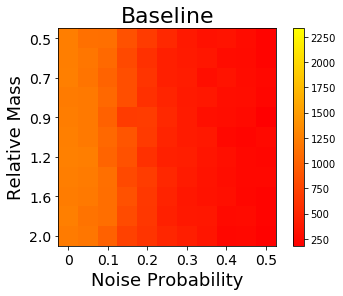

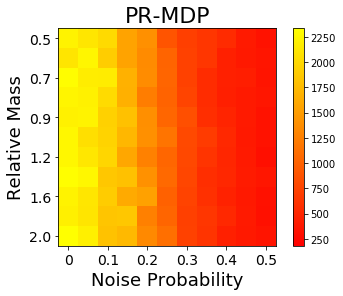

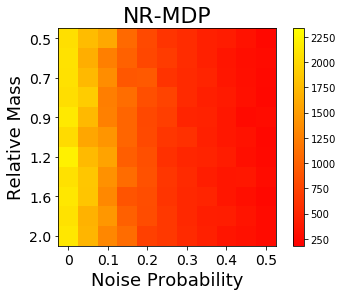

In [47]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
plot_2d('Hopper-v2', params, ['Baseline', 'PR-MDP', 'NR-MDP'], 'Hopper-v2')

## Walker2d-v2

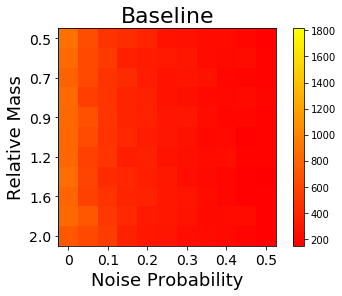

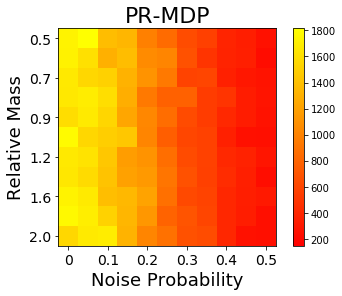

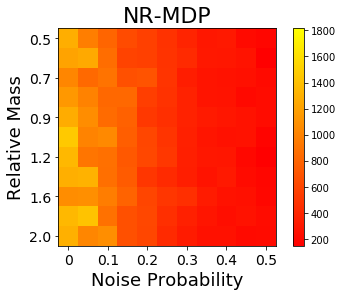

In [48]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
plot_2d('Walker2d-v2', params, ['Baseline', 'PR-MDP', 'NR-MDP'], 'Walker2d-v2')

## Humanoid-v2

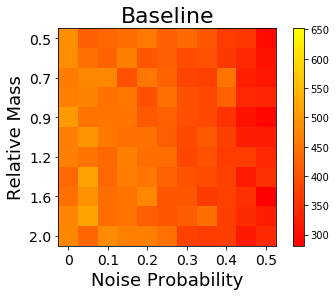

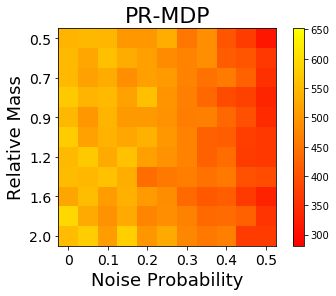

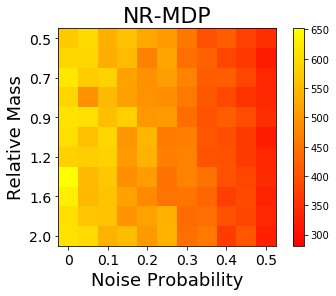

In [49]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
plot_2d('Humanoid-v2', params, ['Baseline', 'PR-MDP', 'NR-MDP'], 'Humanoid-v2')

## Swimmer-v2

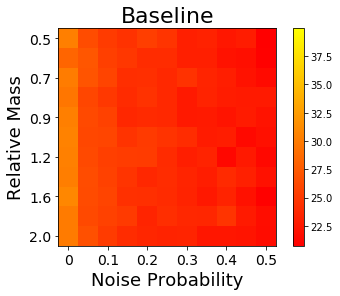

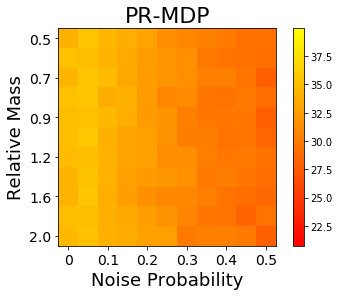

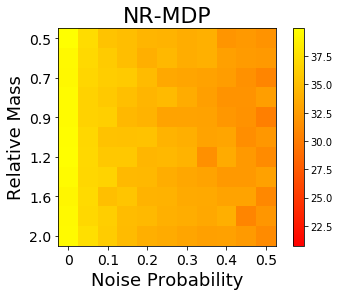

In [50]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
plot_2d('Swimmer-v2', params, ['Baseline', 'PR-MDP', 'NR-MDP'], 'Swimmer-v2')

## Ant-v2

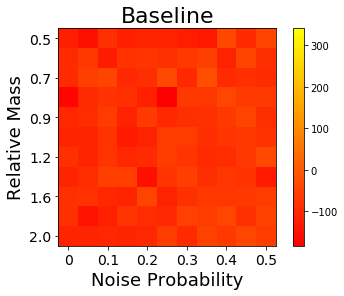

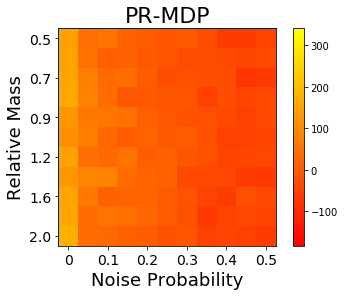

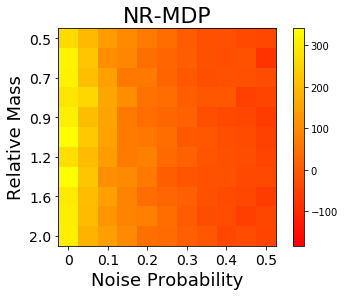

In [51]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
plot_2d('Ant-v2', params, ['Baseline', 'PR-MDP', 'NR-MDP'], 'Ant-v2')

## HalfCheetah-v2

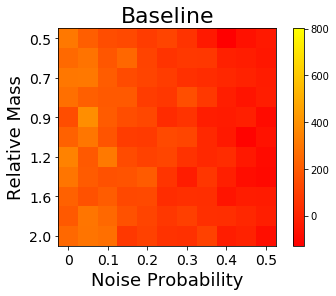

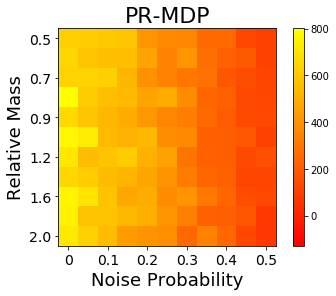

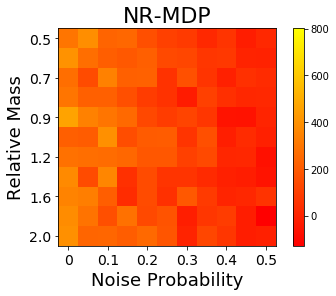

In [52]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
plot_2d('HalfCheetah-v2', params, ['Baseline', 'PR-MDP', 'NR-MDP'], 'HalfCheetah-v2')

## InvertedPendulum-v2

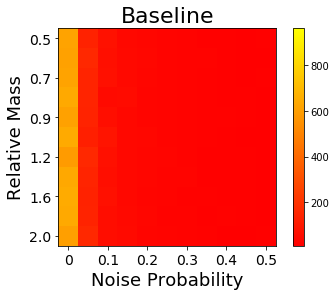

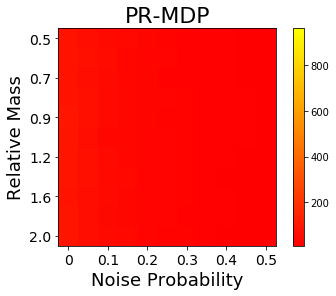

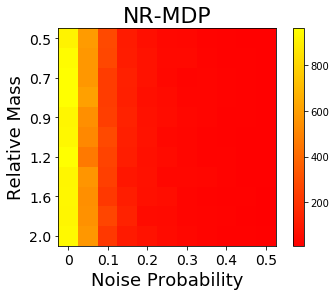

In [53]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
plot_2d('InvertedPendulum-v2', params, ['Baseline', 'PR-MDP', 'NR-MDP'], 'InvertedPendulum-v2')

# Evaluation across MuJoCo on mass uncertainty

## Hopper-v2

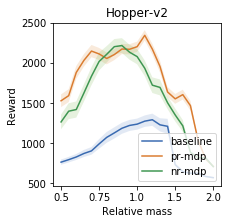

In [54]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
names = ['baseline', 'pr-mdp', 'nr-mdp']
plot_env('Hopper-v2', params, names, 'Hopper-v2')

## Walker2d-v2

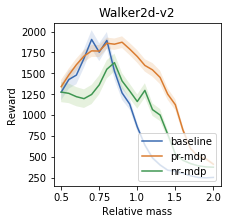

In [55]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
names = ['baseline', 'pr-mdp', 'nr-mdp']
plot_env('Walker2d-v2', params, names, 'Walker2d-v2')

## Humanoid-v2

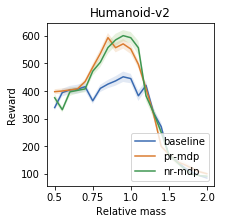

In [56]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
names = ['baseline', 'pr-mdp', 'nr-mdp']
plot_env('Humanoid-v2', params, names, 'Humanoid-v2')

## Swimmer-v2

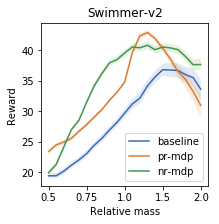

In [57]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
names = ['baseline', 'pr-mdp', 'nr-mdp']
plot_env('Swimmer-v2', params, names, 'Swimmer-v2')

## Ant-v2

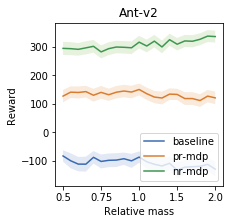

In [58]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
names = ['baseline', 'pr-mdp', 'nr-mdp']
plot_env('Ant-v2', params, names, 'Ant-v2')

## HalfCheetah-v2

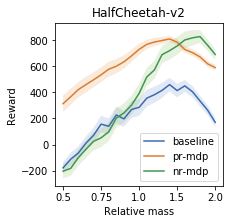

In [59]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
names = ['baseline', 'pr-mdp', 'nr-mdp']
plot_env('HalfCheetah-v2', params, names, 'HalfCheetah-v2')

## InvertedPendulum-v2

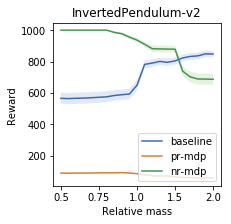

In [60]:
params = ['param_noise/non_robust', 'param_noise/pr_mdp_0.1_10', 'ou_noise/nr_mdp_0.1_1']
names = ['baseline', 'pr-mdp', 'nr-mdp']
plot_env('InvertedPendulum-v2', params, names, 'InvertedPendulum-v2')

# CODE

Command lines:

python3.6 test.py --env <env name> --eval_type model
    
for i in {0..4}; do for env in "Walker2d-v2" "Humanoid-v2" "Swimmer-v2" "HalfCheetah-v2" "Ant-v2" ; do python3.6 main.py --alpha 0 --updates_per_step 10 --seed $i --env-name $env; done; done

In [1]:
import pickle
import os

from scipy.signal import medfilt
from matplotlib import pyplot as pl
import matplotlib as mpl
import numpy as np

In [33]:
def plot_model(results, title):
    x = [i for i in range(21)]
    
    colors = ['#396ab1', '#da7c30', '#3e9651', '#cc2529', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    facecolors = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#ccc210', '#808585']

    f, axarr = pl.subplots(1, 1, figsize=(3, 3))
    
    idx = 0
    for key in results:
        if key not in ['results_model']:
            avg = []
            std = []
            for mass in results[key]:
                avg.append(np.mean(results[key][mass]))
                std.append(np.std(results[key][mass]) / np.sqrt(len(results[key][mass]) - 1) * 2)
            pl.plot(x, avg, label=key, color=colors[idx])
            pl.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=facecolors[idx], alpha=0.2, interpolate=True)
            idx += 1
    pl.legend()
    pl.title(title)
      
    pl.xticks([0, 5, 10, 15, 20], [0.5, 0.75, 1.0, 1.5, 2.0])
        
    pl.xlabel('Relative mass')
    pl.ylabel('Reward')
    axarr.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    pl.show()

In [3]:
def plot_env(env_name, params, names, title):
    base_dir = os.getcwd() + '/models/' + env_name

    results = {} 
    for idx, param in enumerate(params):
        try:
            with open(base_dir + '/' + param + '/results_model', 'rb') as f:
                results[names[idx]] = pickle.load(f)
        except:
            pass

    plot_model(results, title)

In [26]:
def plot_alpha_curves(results, title):    
    colors = ['#396ab1', '#da7c30', '#3e9651', '#cc2529', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    facecolors = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#ccc210', '#808585']

    f, axarr = pl.subplots(1, 1, figsize=(3, 3))
    
    idx = 0
    for mdp_type in results:
        for noise_type in results[mdp_type]:
            x = []
            y_avg = []
            y_std = []
            for alpha in results[mdp_type][noise_type]:
                x.append(alpha)
                y_avg.append(np.mean(results[mdp_type][noise_type][alpha][1.0]))
                y_std.append(np.std(results[mdp_type][noise_type][alpha][1.0]) / np.sqrt(3))
            pl.plot(x, y_avg, label=mdp_type + ' ' + noise_type, color=colors[idx])
            pl.fill_between(x, np.array(y_avg) - np.array(y_std), np.array(y_avg) + np.array(y_std), facecolor=facecolors[idx], alpha=0.2, interpolate=True)
            idx += 1
    pl.legend()
    pl.title(title)
        
    pl.xlabel(r"$\alpha$ value")
    pl.ylabel('Reward')
    axarr.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    pl.show()

In [5]:
def plot_alpha(env_name, title):
    base_dir = os.getcwd() + '/models/' + env_name

    results = {}
    for mdp_type in ['pr_mdp']:
        results[mdp_type] = {}
        for noise_type in ['no_noise', 'ou_noise', 'param_noise']:
            results[mdp_type][noise_type] = {}
            for alpha in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]:
                try:
                    with open(base_dir + '/' + noise_type + '/' + mdp_type + '_' + str(alpha) + '_10' + '/results_model', 'rb') as f:
                        results[mdp_type][noise_type][alpha] = pickle.load(f)
                except:
                    pass

    plot_alpha_curves(results, title)
    
    results = {}
    for mdp_type in ['nr_mdp']:
        results[mdp_type] = {}
        for noise_type in ['no_noise', 'ou_noise', 'param_noise']:
            results[mdp_type][noise_type] = {}
            for alpha in [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]:
                try:
                    with open(base_dir + '/' + noise_type + '/' + mdp_type + '_' + str(alpha) + '_10' + '/results_model', 'rb') as f:
                        results[mdp_type][noise_type][alpha] = pickle.load(f)
                except:
                    pass

    plot_alpha_curves(results, title)

In [46]:
def plot_2d(env_name, params, names, title):
    base_dir = os.getcwd() + '/models/' + env_name

    results = {}
    vmin = 2000
    vmax = -2000
    for idx, param in enumerate(params):
        try:
            with open(base_dir + '/' + param + '/results_model_noise', 'rb') as f:
                data = pickle.load(f)

                mat = np.zeros((11, 11))
                row = 0
                for key in data:
                    col = 0
                    for key2 in data[key]:
                        mat[row, col] = np.mean(data[key][key2])
                        col += 1
                    row += 1
                results[names[idx]] = mat

                vmin = min(vmin, np.min(mat))
                vmax = max(vmax, np.max(mat))
        except:
            pass

    for key in results:
        
        pl.imshow(results[key], cmap='autumn', interpolation='nearest', vmin=vmin, vmax=vmax)
        x = [0,2,4,6,8,10]
        #[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
        labels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
        pl.xticks(x, labels, fontsize=14)

        y = [0,2,4,6,8,10]
        #[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
        labels = [0.5, 0.7, 0.9, 1.2, 1.6, 2.0]
        pl.yticks(y, labels, fontsize=14)

        pl.xlabel('Noise Probability', fontsize=18)
        pl.ylabel('Relative Mass', fontsize=18)
        pl.title(key, fontsize=22)

        pl.colorbar()

        pl.show()

In [7]:
def plot_env_curves(env_name, params, names, title):
    base_dir = os.getcwd() + '/models/' + env_name

    results = {}
    for idx, param in enumerate(params):
        try:
            result = []
            for n in range(5):
                with open(base_dir + '/' + param + '/' + str(n) + '/' + '/results', 'rb') as f:
                    data = pickle.load(f)
                    if len(data['train_rewards']) == 0:
                        result.append(data['eval_rewards'])
                    else:
                        result.append(data['train_rewards'])
            results[names[idx]] = np.array(result)
        except:
            pass
    plot_learning_curves(results, title)

In [34]:
def plot_learning_curves(results, title):
    colors = ['#396ab1', '#da7c30', '#3e9651', '#cc2529', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    facecolors = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#ccc210', '#808585']

    f, axarr = pl.subplots(1, 1, figsize=(3, 3))
    
    idx = 0
    for key in results:
        if key not in ['results_model']:
            x = np.linspace(0, 1000, results[key].shape[1])
            avg = np.mean(results[key][:,:,1], axis=0)
            std = np.std(results[key][:,:,1], axis=0) / (np.sqrt(results[key].shape[0] - 1) * 2)
            pl.plot(x, avg, label=key, color=colors[idx])
            pl.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=facecolors[idx], alpha=0.2, interpolate=True)
            idx += 1
            
    pl.legend()
    pl.title(title)
      
    pl.xlabel('Relative mass')
    pl.ylabel('Reward')
    axarr.legend(loc='lower right', bbox_to_anchor=(1, 0))
    
    pl.show()